### Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

from skimage.io import imsave

The data can be obtained from https://www.kaggle.com/ardamavi/sign-language-digits-dataset (preprocessed) or https://github.com/ardamavi/Sign-Language-Digits-Dataset (raw).

__Load and Preprocess Data__

In [2]:
# Load image data and preprocess
X_raw = np.load(open('data/Sign-language-digits-dataset/X.npy', 'rb'))
y_raw = np.load(open('data/Sign-language-digits-dataset/y.npy', 'rb'))
print('X_raw shape: {}'.format(X_raw.shape))
print('y_raw shape: {}'.format(y_raw.shape))

# Flatten X_raw and transpose for later calculation
X_data = X_raw.reshape(X_raw.shape[0], -1).T
print('X_data shape: {}'.format(X_data.shape))

# Transpose y_raw and convert from one-hot labels to integer labels
y_data = y_raw.T
y_data = np.argmax(y_data, axis=0).reshape((1, y_data.shape[1]))
print('y_data shape: {}'.format(y_data.shape))

# Choose the data of just two categories for binary logistic regresssion
X_cat0 = X_data[:, np.where(y_data == 0)[1]]
y_cat0 = y_data[:, np.where(y_data == 0)[1]]
X_cat1 = X_data[:, np.where(y_data == 7)[1]]
y_cat1 = y_data[:, np.where(y_data == 7)[1]]

# Convert the labels of y_cat0 to 0, and y_cat1 to 1
y_cat0 = np.zeros_like(y_cat0)
y_cat1 = np.ones_like(y_cat1)

print()
print('X_cat0 shape: {}'.format(X_cat0.shape))
print('y_cat0 shape: {}'.format(y_cat0.shape))
print('X_cat1 shape: {}'.format(X_cat1.shape))
print('y_cat1 shape: {}'.format(y_cat1.shape))

# Select the first 72% from each category and combine them together for training data, and the rest for test data
ind_cat0 = int(0.72 * X_cat0.shape[1])
ind_cat1 = int(0.72 * X_cat1.shape[1])

X_train = np.concatenate((X_cat0[:, :ind_cat0], X_cat1[:, :ind_cat1]), axis=1)
y_train = np.concatenate((y_cat0[:, :ind_cat0], y_cat1[:, :ind_cat1]), axis=1)
X_test = np.concatenate((X_cat0[:, ind_cat0:], X_cat1[:, ind_cat1:]), axis=1)
y_test = np.concatenate((y_cat0[:, ind_cat0:], y_cat1[:, ind_cat1:]), axis=1)

print()
print('X_train shape {}'.format(X_train.shape))
print('y_train shape {}'.format(y_train.shape))
print('X_test shape {}'.format(X_test.shape))
print('y_test shape {}'.format(y_test.shape))

X_raw shape: (2062, 64, 64)
y_raw shape: (2062, 10)
X_data shape: (4096, 2062)
y_data shape: (1, 2062)

X_cat0 shape: (4096, 204)
y_cat0 shape: (1, 204)
X_cat1 shape: (4096, 206)
y_cat1 shape: (1, 206)

X_train shape (4096, 294)
y_train shape (1, 294)
X_test shape (4096, 116)
y_test shape (1, 116)


__Visualize__

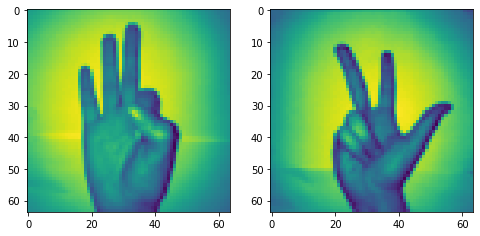

In [3]:
# Visualize random point of data
img_cat0 = X_cat0[:, 11].reshape((64,64))
img_cat1 = X_cat1[:, 11].reshape((64,64))

fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(img_cat0)
fig.add_subplot(1, 2, 2)
plt.imshow(img_cat1)
plt.show()

__Activation Function__

In [4]:
# use sigmoid function as activation function for binary logistic regression
def sigmoid(z):
    a = 1/(1 + np.exp(-z))
    return a

__Gradient Descent__

In [5]:
# gradient_descent() will compute feature weights and bias using gradient descent for binary logistic regression
def gradient_descent(X, y, alpha=0.005, epochs=5000):
    # initialize parameters
    w = np.zeros((X.shape[0], 1))
    b = 0.0
    
    # gradient descent
    m = X.shape[1]
    for epoch in range(epochs):
        # compute activation, loss, and update gradients in backwards pass
        a = sigmoid(w.T.dot(X) + b)
        loss = -(1/m)*np.sum(y*np.log(a) + (1-y)*np.log(1-a))
        dw = (1/m)*X.dot((a-y).T)
        db = (1/m)*np.sum(a-y)
        w = w - alpha*dw
        b = b - alpha*db
    return w, b, loss

__Predictions__

In [6]:
# predict() will predict if an image is in class 0 or class 1 given feature weights and bias
def predict(X, w, b):
    # initialize predictions
    m = X.shape[1]
    y_hat = np.zeros((1, m))
    # make predictions
    a = sigmoid(w.T.dot(X) + b)
    # use 0.5 as cutoff to indicate which class an image most likely belongs to
    for i in range(a.shape[1]):
        y_hat[0, i] = a[0, i] > 0.5
    return y_hat

__Evaluation__

In [7]:
# train logistic regression model
alpha = 0.002
epochs = 15000
w, b, loss = gradient_descent(X_train, y_train, alpha, epochs)

# test logistic regression model and compute accuracies
y_hat_train = predict(X_train, w, b)
y_hat_test = predict(X_test, w, b)
train_accuracy = np.sum(y_hat_train == y_train) / y_train.shape[1]
test_accuracy = np.sum(y_hat_test == y_test) / y_test.shape[1]

# output results
print('Training Accuracy: {}%'.format(math.floor(train_accuracy * 10000) / 100.0))
print('Testing Accuracy: {}%'.format(math.floor(test_accuracy * 10000) / 100.0))
print('Final Model Loss: {}'.format(math.floor(loss * 10000) / 10000.0))

Training Accuracy: 99.31%
Testing Accuracy: 97.41%
Final Model Loss: 0.0478


__Metrics__

In [8]:
# Calculate true positive, false positive, true negative, false negative, accuracy, precision, recall, and F-1 score
# Assume that label y = 1 is positive, and y = 0 is negative
def calculate_metrics(y_test, y_hat_test):
    true_positive = np.sum(np.logical_and(y_test == 1, y_hat_test == 1))
    false_positive = np.sum(np.logical_and(y_test == 0, y_hat_test == 1))
    true_negative = np.sum(np.logical_and(y_test == 0, y_hat_test == 0))
    false_negative = np.sum(np.logical_and(y_test == 1, y_hat_test == 0))
    accuracy = (true_positive + true_negative)/(true_positive + false_positive + true_negative + false_negative)
    precision = true_positive/(true_positive + false_positive)
    recall = true_positive/(true_positive + false_negative)
    F1 = (2*precision*recall)/(precision + recall)
    metrics = {
        'TP': true_positive,
        'FP': false_positive,
        'TN': true_negative,
        'FN': false_negative,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': F1
    }
    return metrics

In [9]:
# calculate and output metrics for the trained model
m = calculate_metrics(y_test, y_hat_test)
print('True Positive = {}'.format(m['TP']))
print('False Positive = {}'.format(m['FP']))
print('True Negative = {}'.format(m['TN']))
print('False Negative = {}'.format(m['FN']))
print('Accuracy = {}'.format(math.floor(m['Accuracy'] * 1000) / 1000.0))
print('Precision = {}'.format(math.floor(m['Precision'] * 1000) / 1000.0))
print('Recall = {}'.format(math.floor(m['Recall'] * 1000) / 1000.0))
print('F1 = {}'.format(math.floor(m['F1'] * 1000) / 1000.0))

True Positive = 55
False Positive = 0
True Negative = 58
False Negative = 3
Accuracy = 0.974
Precision = 1.0
Recall = 0.948
F1 = 0.973
